In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("thenlper/gte-large")

# Sentences we want to encode. Example:
sentence = "This framework generates embeddings for each input sentence"

# Sentences are encoded by calling model.encode()
embedding = model.encode(sentence, output_value="token_embeddings")

In [ ]:
embedding = model.encode(sentence, output_value="token_embeddings")
embedding.shape

In [ ]:
embedding.mean(axis=0).shape

In [ ]:
w1 = "payment"
w2 = "onion"

# Compute the embeddings
embedding1 = model.encode(w1, output_value="token_embeddings")
embedding2 = model.encode(w2, output_value="token_embeddings")

# Compute the cosine-similarity
from sentence_transformers import SimilarityFunction

cosine_fn = SimilarityFunction.to_similarity_fn("cosine")
cosine_score = cosine_fn(embedding1, embedding2)

print("Cosine-Similarity:", cosine_score)

In [ ]:
embedding2.shape

In [1]:
from report_metrics import *

/Users/mismayil/.pyenv/versions/3.10.14/envs/cs-gen/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [10]:
text1 = "Hello world! How are you doing?"

emb1 = get_embedding(text1)

In [11]:
text2 = "Thank you! I am doing well."
emb2 = get_embedding(text2)

In [ ]:
emb2

In [2]:
text3 = "In the heart of the enchanted forest stood a sentient house, its windows like eyes observing the world. It longed to live, to experience life beyond its rooted existence. One moonlit night, a shooting star granted its wish, transforming the house into a towering golem of wood and stone. As it roamed the forest, its window-eyes saw wonders and met creatures it had only dreamed of. With each step, the house-turned-golem learned the essence of life, its walls now filled with memories instead of rooms."
get_words(text3, remove_stopwords=False, dominant_k=5)

['the', 'of', 'its', 'a', 'house']

In [ ]:
dis = compute_sem_dis(emb1, emb2)
dis

In [3]:
text4 = "As the alien spacecraft hovered silently above the city, its metallic surface gleaming in the moonlight, Dr. Eliza Chen peered anxiously through the observatory's window. Her lifetime of research into extraterrestrial life had led to this moment, but nothing could have prepared her for the sight of the massive vessel, easily the size of a house, descending gracefully towards the Earth. With trembling hands, she reached for the radio transmitter, knowing that her next words could determine whether humanity would live or perish. \"Welcome,\" she breathed into the microphone, her voice barely above a whisper, \"We come in peace.\" The ship's response came not in words, but in a brilliant burst of light that bathed the entire planet in a warm, comforting glow."
compute_theme_uniqueness([text3, text4], cluster_distance_threshold=0.5)

[1.0, 1.0]

In [7]:
compute_surprise(text3), compute_surprise(text4), compute_surprise("".join([text3, text4]))

(0.023017248541417762, 0.016241591014377388, 0.019932572159316275)

In [9]:
compute_n_gram_diversity(text3, max_n_gram=3)

[0.6213592233009708, 0.9705882352941176, 1.0]

In [1]:
from report_metrics import *

/Users/mismayil/.pyenv/versions/3.10.14/envs/cs-gen/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [3]:
rel_text1 = "automation innovation software hardware engineering robotics programming digital network data"
rel_text2 = "food cooking recipe restaurant chef cuisine ingredient flavor"
unrel_text1 = "ocean laptop basketball poetry mountain refrigerator zebra guitar democracy candle"

In [ ]:
compute_avg_sem_dis(rel_text1), compute_avg_sem_dis(rel_text2), compute_avg_sem_dis(unrel_text1)

In [3]:
compute_avg_sem_dis(rel_text1), compute_avg_sem_dis(rel_text2), compute_avg_sem_dis(unrel_text1)

(0.20274831851323447, 0.15473486483097076, 0.22474116219414605)

In [5]:
get_words(rel_text1), get_words(rel_text2), get_words(unrel_text1)

(['digital',
  'hardware',
  'automation',
  'network',
  'robotic',
  'program',
  'software',
  'engineering',
  'innovation',
  'datum'],
 ['flavor',
  'recipe',
  'chef',
  'restaurant',
  'cooking',
  'ingredient',
  'cuisine',
  'food'],
 ['mountain',
  'laptop',
  'basketball',
  'zebra',
  'refrigerator',
  'guitar',
  'democracy',
  'ocean',
  'candle',
  'poetry'])

In [6]:
emb1 = get_embedding("democracy")
emb2 = get_embedding("candle")

compute_sem_dis(emb1, emb2)

0.24128174781799316

In [10]:
compute_theme_uniqueness([rel_text1, rel_text2, rel_text2, unrel_text1], cluster_distance_threshold=0.5)

[1.0, 0.5, 0.5, 1.0]

In [5]:
from utils import read_json, write_json, find_files
from statistics import mean

data_dir = "../experiments/reports/pilot/run1_report2/gemini-1.5-flash"
files = find_files(data_dir, "json")

for results_file in files:
    results = read_json(results_file)
    results["metrics"]["avg_n_gram_diversity"] = [mean([result["metrics"]["n_gram_diversity"][n_gram_len-1] for result in results["data"] if "metrics" in result]) for n_gram_len in range(1, 6)]
    write_json(results, results_file)

In [1]:
import seaborn as sns

sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
import pandas as pd

claude_data = pd.read_csv("../experiments/reports/pilot/run1_report1/claude-3-5-sonnet-20240620/pilot_claude-3-5-sonnet-20240620_run1_report1_metrics.csv")
gemini_data = pd.read_csv("../experiments/reports/pilot/run1_report1/gemini-1.5-flash/pilot_gemini-1.5-flash_run1_report1_metrics.csv")
gpt4_data = pd.read_csv("../experiments/reports/pilot/run1_report1/gpt-4/pilot_gpt-4_run1_report1_metrics.csv")
human_data = pd.read_csv("../experiments/reports/pilot/run1_report1/human/pilot_human_run1_report1_metrics.csv")

claude_data["model"] = "claude"
gemini_data["model"] = "gemini"
gpt4_data["model"] = "gpt-4"
human_data["model"] = "human"

data = pd.concat([claude_data, gemini_data, gpt4_data, human_data])

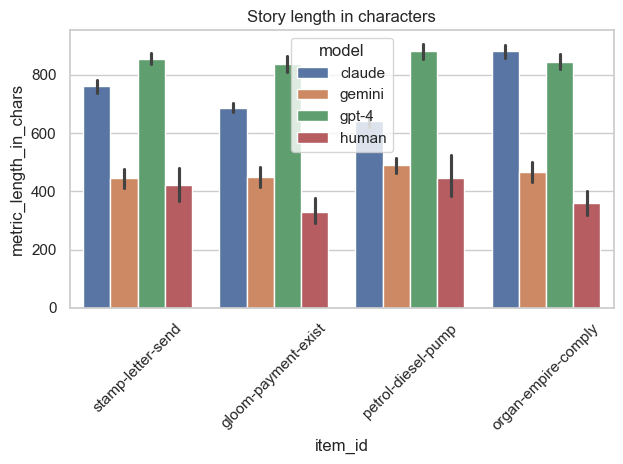

In [4]:
sns.barplot(x="item_id", y="metric_length_in_chars", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Story length in characters")
plt.tight_layout()

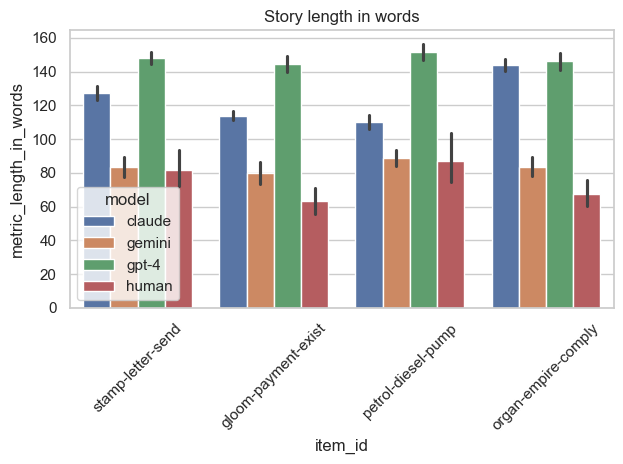

In [5]:
sns.barplot(x="item_id", y="metric_length_in_words", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Story length in words")
plt.tight_layout()

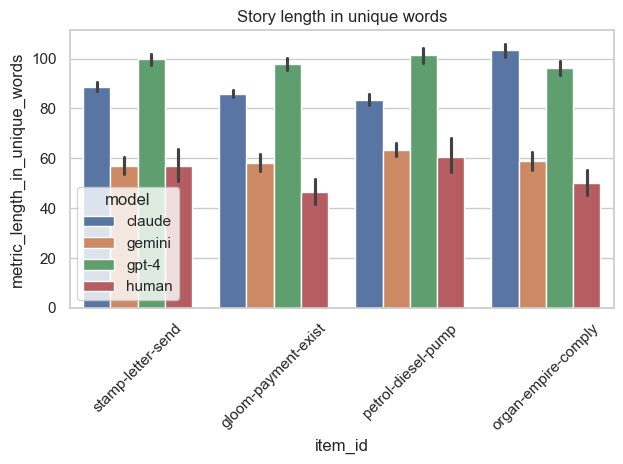

In [7]:
sns.barplot(x="item_id", y="metric_length_in_unique_words", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Story length in unique words")
plt.tight_layout()

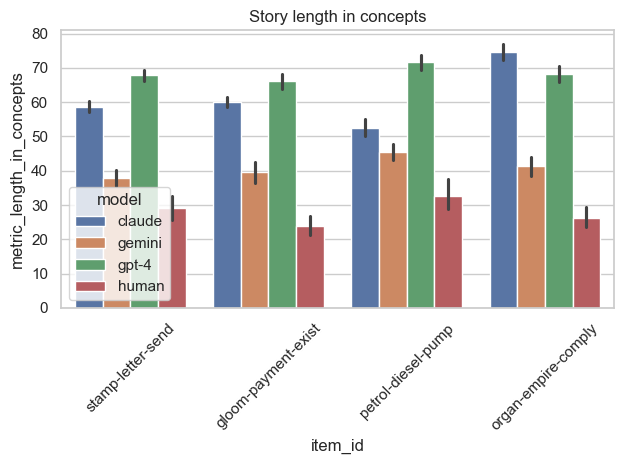

In [8]:
sns.barplot(x="item_id", y="metric_length_in_concepts", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Story length in concepts")
plt.tight_layout()

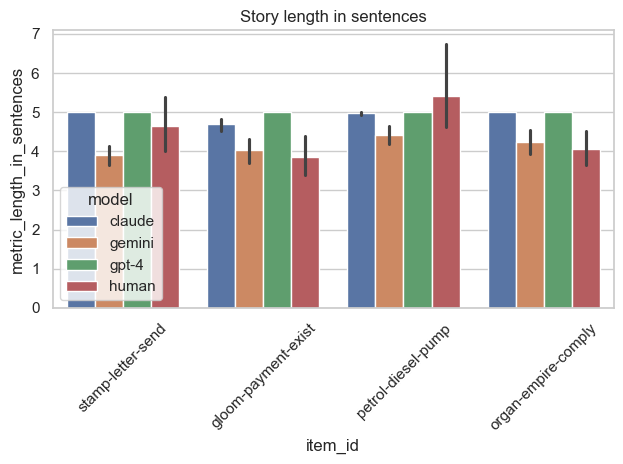

In [9]:
sns.barplot(x="item_id", y="metric_length_in_sentences", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Story length in sentences")
plt.tight_layout()

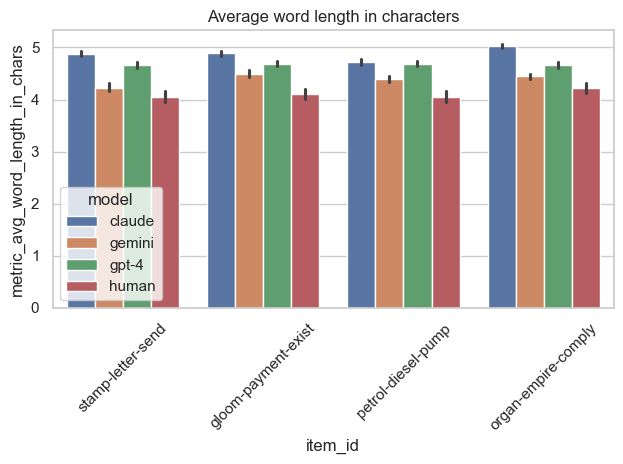

In [10]:
sns.barplot(x="item_id", y="metric_avg_word_length_in_chars", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Average word length in characters")
plt.tight_layout()

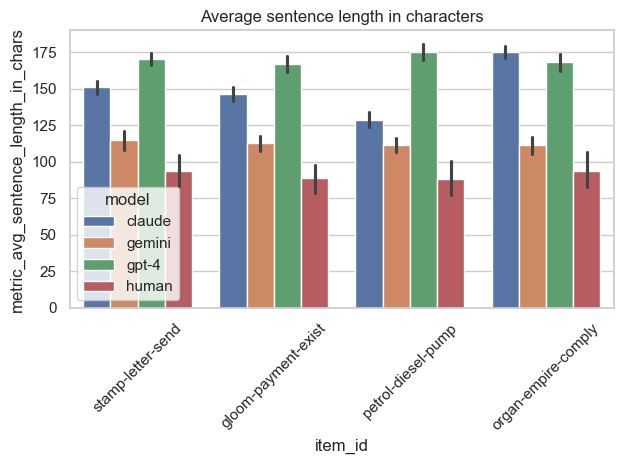

In [12]:
sns.barplot(x="item_id", y="metric_avg_sentence_length_in_chars", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Average sentence length in characters")
plt.tight_layout()

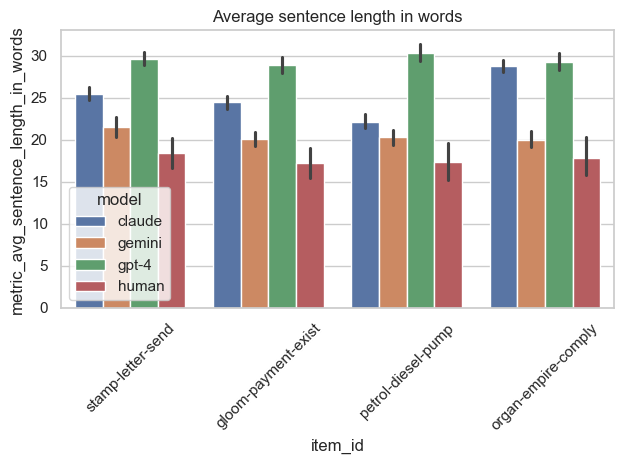

In [14]:
sns.barplot(x="item_id", y="metric_avg_sentence_length_in_words", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Average sentence length in words")
plt.tight_layout()

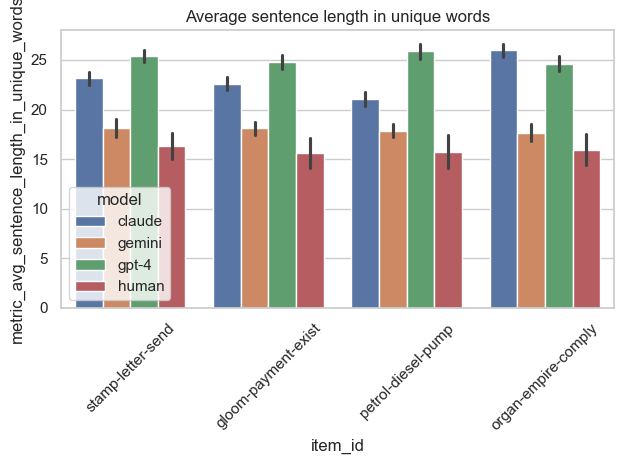

In [15]:
sns.barplot(x="item_id", y="metric_avg_sentence_length_in_unique_words", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Average sentence length in unique words")
plt.tight_layout()

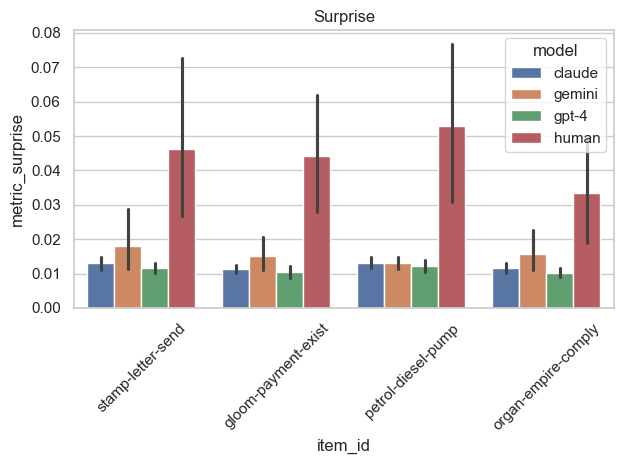

In [16]:
sns.barplot(x="item_id", y="metric_surprise", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Surprise")
plt.tight_layout()

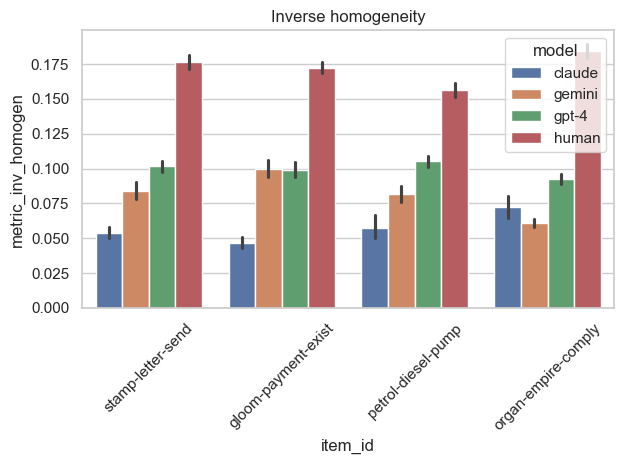

In [17]:
sns.barplot(x="item_id", y="metric_inv_homogen", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Inverse homogeneity")
plt.tight_layout()

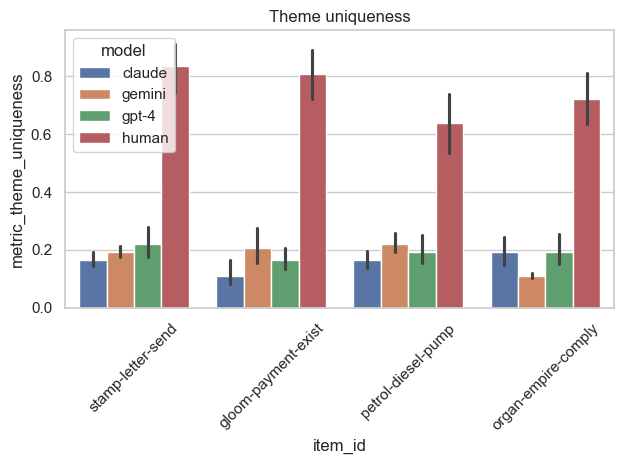

In [18]:
sns.barplot(x="item_id", y="metric_theme_uniqueness", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Theme uniqueness")
plt.tight_layout()

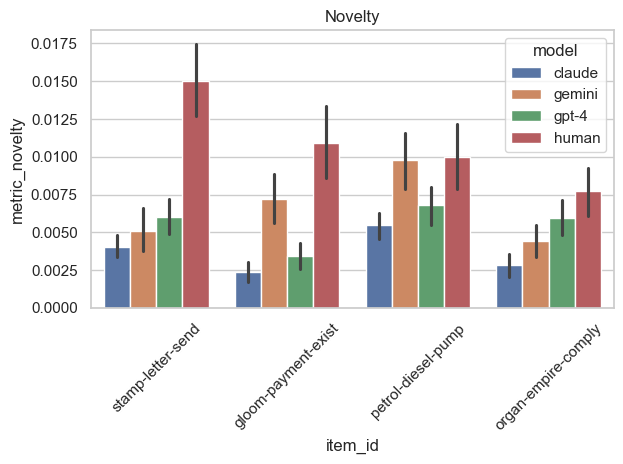

In [19]:
sns.barplot(x="item_id", y="metric_novelty", hue="model", data=data)
plt.xticks(rotation=45)
plt.title("Novelty")
plt.tight_layout()

In [22]:
from utils import read_json, write_json, find_files
from report_metrics import compute_n_gram_diversity
from tqdm import tqdm

results_dir = "../experiments/reports/pilot/run1_report1/claude-3-5-sonnet-20240620"
results_files = find_files(results_dir, "json")

for results_file in tqdm(results_files, desc="Processing files"):
    results = read_json(results_file)
    stories = [result["output"] for result in results["data"]]
    corpus_n_gram_diversity, _ = compute_n_gram_diversity("".join(stories), 20)
    results["metrics"]["corpus_n_gram_diversity"] = corpus_n_gram_diversity
    results["metrics"]["num_unique_stories"] = len(set(stories))
    write_json(results, results_file)

Processing files: 100%|██████████| 4/4 [00:00<00:00, 22.86it/s]


In [ ]:
from utils import read_json
import pandas as pd

data_dir = "/Users/mismayil/Desktop/EPFL/TA/DIS/project1/data"
data = read_json(f"{data_dir}/corpus.json")

pd.DataFrame(data).to_csv(f"{data_dir}/corpus.csv", index=False)

In [8]:
data[:5]

[{'docid': 'doc-en-9633',
  'text': 'Mars Hill Church was a Christian megachurch, founded by Mark Driscoll, Lief Moi, and Mike Gunn. It was a multi-site church based in Seattle, Washington and grew from a home Bible study to 15 locations in 4 U.S. states. Services were offered at its 15 locations; the church also podcast content of weekend services, and of conferences, on the Internet with more than 260,000 sermon views online every week. In 2013, Mars Hill had a membership of 6,489 and average weekly attendance of 12,329. Following controversy in 2014 involving founding pastor Mark Driscoll, attendance dropped to 8,0009,000 people per week.\n\nAt the end of September, 2014, an investigation by the church elders found "bullying" and "patterns of persistent sinful behavior" by Driscoll. The church elders crafted a "restoration" plan to help Driscoll and save the church. Instead, Driscoll declined the restoration plan and resigned. On October 31, 2014, lead pastor Dave Bruskas announced 